# Step 1: Import Libraries & Load Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
retail_df = pd.read_csv("online_retail.csv", encoding="latin1")

# Quick view
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Step 2: Inspect the Data

In [2]:
# Check basic info
retail_df.info()

# Basic stats
retail_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
# Check missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Step 3: Clean the Data

In [4]:
# Remove missing Customer IDs
retail_df = retail_df.dropna(subset=["CustomerID"])


In [5]:
# Remove cancelled orders
# Cancelled invoices start with C:
retail_df = retail_df[~retail_df["InvoiceNo"].astype(str).str.startswith("C")]

In [6]:
# Remove zero or negative Quantity and UnitPrice
retail_df = retail_df[(retail_df["Quantity"] > 0) & (retail_df["UnitPrice"] > 0)]


In [7]:
# Create TotalPrice Column
retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]


# Step 4: Convert InvoiceDate to Datetime

In [8]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])



# Step 5: Quick Exploratory Analysis

In [9]:
# Total Revenue
total_revenue = retail_df["TotalPrice"].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 8911407.904


In [10]:
# Top 5 countries by revenue
country_sales = retail_df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
print(country_sales.head(5))


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalPrice, dtype: float64


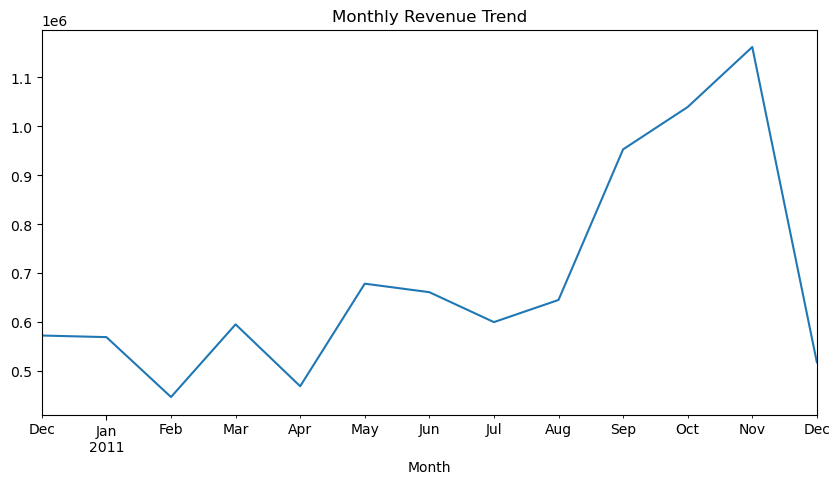

In [11]:
# Monthly sales trend
retail_df["Month"] = retail_df["InvoiceDate"].dt.to_period("M")
monthly_sales = retail_df.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind="line", figsize=(10,5), title="Monthly Revenue Trend")
plt.show()
